In [1]:
from bingo import *
import numpy as np
import matplotlib.pyplot as plt

In [6]:
n = 10
players = 10000
rounds = 400

min_entry = 1
max_entry = 50

bc_array = np.zeros((players, n, n, 2))
for i in np.arange(players):
    bc_array[i, :, :, :] = bingo_card(n)

round_wins = np.zeros(rounds)
for r in np.arange(rounds):
    # print(f"Round {r+1}")
    # pick a random integer between min_entry and max_entry
    # pick a random integer to select a random column
    pick = np.random.randint(low=min_entry, high=max_entry+1)
    col = np.random.randint(0, high=n)
    for i in np.arange(players):
        bc_array[i, np.argwhere(bc_array[i, :, col, :] == pick), col, 1] = 1
        round_wins[r] += check_bingo(bc_array[i, :, :, :])

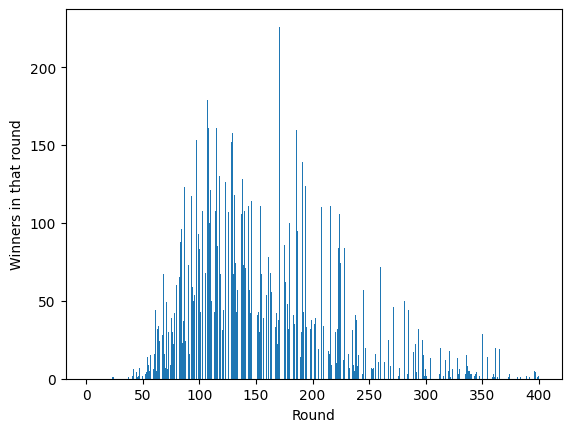

In [7]:
plt.bar(np.arange(2,rounds+1), np.diff(round_wins));
plt.xlabel("Round");
plt.ylabel("Winners in that round");

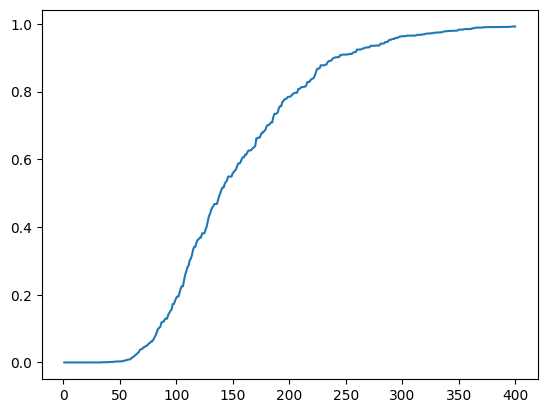

In [12]:
plt.plot(np.arange(1,rounds+1), round_wins / players);

Text(0, 0.5, 'Rounds occurred')

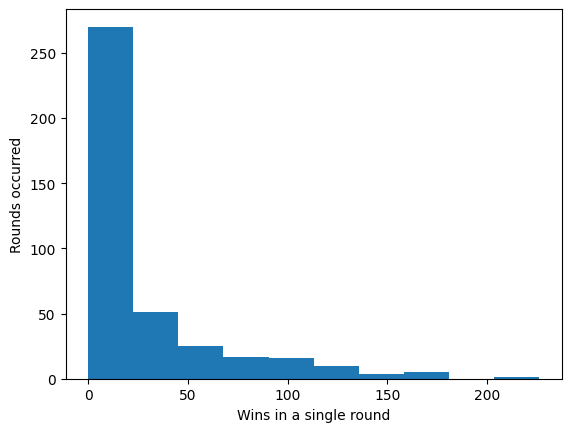

In [8]:
plt.hist(np.diff(round_wins))
plt.xlabel("Wins in a single round")
plt.ylabel("Rounds occurred")